<a href="https://colab.research.google.com/github/mohammed893/API_image_TF_MODEL/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Get the data
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-12-07 21:16:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.1.207, 108.177.121.207, 172.217.214.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.1.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  70.3MB/s    in 1.5s    

2023-12-07 21:16:32 (70.3 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



# I will Start with a small DataSet to experiment quickly and figure what works and what doesn't work  

##Inspect the data (Become one with it)
Visualize , Visualize , visualize

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak/

In [ ]:
import os
#Walk through dir and list number of files
for dirpath , dirnames , filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} dirs and {len(filenames)} images in '{dirpath}' .")

There are 2 dirs and 0 images in 'pizza_steak' .
There are 2 dirs and 0 images in 'pizza_steak/test' .
There are 0 dirs and 250 images in 'pizza_steak/test/pizza' .
There are 0 dirs and 250 images in 'pizza_steak/test/steak' .
There are 2 dirs and 0 images in 'pizza_steak/train' .
There are 0 dirs and 750 images in 'pizza_steak/train/pizza' .
There are 0 dirs and 750 images in 'pizza_steak/train/steak' .


In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
#Created a list of class_names from
print(class_names)

['pizza' 'steak']


In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image (target_dir , target_class):
  # Set the target dir
  target_fold = target_dir +"/"+ target_class
  # Get a random image path
  random_img = random.sample(os.listdir(target_fold) , 1)
  print(random_img)
  # Read and plot Img
  img = mpimg.imread(target_fold + "/" + random_img[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"image shape: {img.shape}") #Show the shape of the img
  return img



In [ ]:
#View a random ing from the train_set
img = view_random_image(target_dir = "pizza_steak/train" , target_class = "pizza")

In [ ]:
import tensorflow as tf
tf.constant(img)

NameError: ignored

In [ ]:
# End to End CNN
#-> Load images
#-> prepocess
#-> Build cnn
#-> Compile CNN
#-> Fit




# END to END CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Set the seed
tf.random.set_seed(42)

#preprocess data (normalization)
train_datagen = ImageDataGenerator(rescale=  1./255)
valid_datagen = ImageDataGenerator(rescale=  1./255)
#Setup paths to our data dirs
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

#Import data from dir and turn it into batches
train_data=  train_datagen.flow_from_directory(directory =  train_dir ,
                                               batch_size = 32 ,
                                               target_size = (224 , 224) ,
                                               class_mode = "binary" ,
                                               seed = 42)

valid_data= valid_datagen.flow_from_directory(directory = test_dir ,
                                              batch_size = 32 ,
                                              target_size = (224 , 224),
                                              class_mode = "binary" ,
                                              seed = 42)

#Build a CNN model

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10 ,
                           kernel_size= 3 ,
                           activation = 'relu' ,
                           input_shape = (224 , 224 , 3)) ,

    tf.keras.layers.Conv2D(10 , 3 , activation = 'relu') ,

    tf.keras.layers.MaxPool2D(pool_size = 2 , padding = "valid") ,

    tf.keras.layers.Conv2D(10 , 3 , activation = 'relu') ,

    tf.keras.layers.Conv2D(10 , 3 , activation = 'relu') ,

    tf.keras.layers.Conv2D(10 , 3 , activation = 'relu') ,

    tf.keras.layers.MaxPool2D(2) ,

    tf.keras.layers.Flatten() ,

    tf.keras.layers.Dense(1 , activation = "sigmoid")



])

#Compile our CNN :
model_1.compile(loss = "binary_crossentropy" ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["accuracy"])
#Fit the model
history_1 = model_1.fit(train_data ,
                        epochs = 5  ,
                        steps_per_epoch=len(train_data) #47
                      , validation_data= valid_data ,
                        validation_steps= len(valid_data))


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 conv2d_4 (Conv2D)           (None, 104, 104, 10)      910       
                                                        

# Using the same model as Before[The Normal NN]


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Set the seed
tf.random.set_seed(42)

#preprocess data (normalization)
train_datagen = ImageDataGenerator(rescale=  1./255)
valid_datagen = ImageDataGenerator(rescale=  1./255)
#Setup paths to our data dirs
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

#Import data from dir and turn it into batches
train_data =  train_datagen.flow_from_directory(directory =  train_dir ,
                                               batch_size = 32 ,
                                               target_size = (244 , 244) ,
                                               class_mode = "binary" ,
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir ,
                                              batch_size = 32 ,
                                              target_size = (244 , 244),
                                              class_mode = "binary" ,
                                              seed = 42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


##Model 2

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Set the seed
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=  1./255)
valid_datagen = ImageDataGenerator(rescale=  1./255)
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

train_data =  train_datagen.flow_from_directory(directory =  train_dir ,
                                               batch_size = 32 ,
                                               target_size = (224 , 224) ,
                                               class_mode = "binary" ,
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir ,
                                              batch_size = 32 ,
                                              target_size = (224 , 224),
                                              class_mode = "binary" ,
                                              seed = 42)

tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224 , 224 , 3)) ,
    tf.keras.layers.Dense(4 , activation = 'relu'),
    tf.keras.layers.Dense(4 , activation = 'relu'),
    tf.keras.layers.Dense(4 , activation = 'relu'),
    tf.keras.layers.Dense(1 , activation = 'sigmoid')
])

model_2.compile(loss = "binary_crossentropy" ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["accuracy"]
                )
#Fit the model
history_2 = model_2.fit(train_data,
                        epochs = 5 ,
                        steps_per_epoch = len(train_data) ,
                        validation_data = valid_data,
                        validation_steps = len(valid_data)
                        )

##Model 3


In [ ]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224 , 224 , 3)) ,
    tf.keras.layers.Dense(100 , activation = 'relu'),
    tf.keras.layers.Dense(100 , activation = 'relu'),
    tf.keras.layers.Dense(100 , activation = 'relu'),
    tf.keras.layers.Dense(1 , activation = 'sigmoid')
])

model_3.compile(loss = "binary_crossentropy" ,
                optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001) ,
                metrics = ["accuracy"]
                )
#Fit the model
history_3 = model_3.fit(train_data,
                        epochs = 10 ,
                        steps_per_epoch = len(train_data) ,
                        validation_data = valid_data,
                        validation_steps = len(valid_data)
                        )

Epoch 1/10
47/47 [==============================] - 7s 135ms/step - loss: 0.6049 - accuracy: 0.6673 - val_loss: 0.5089 - val_accuracy: 0.7460
Epoch 2/10
47/47 [==============================] - 5s 105ms/step - loss: 0.5240 - accuracy: 0.7393 - val_loss: 0.5801 - val_accuracy: 0.6760
Epoch 3/10
47/47 [==============================] - 6s 128ms/step - loss: 0.4873 - accuracy: 0.7627 - val_loss: 0.5024 - val_accuracy: 0.7360
Epoch 4/10
47/47 [==============================] - 6s 131ms/step - loss: 0.4661 - accuracy: 0.7833 - val_loss: 0.4355 - val_accuracy: 0.7940
Epoch 5/10
47/47 [==============================] - 6s 127ms/step - loss: 0.4525 - accuracy: 0.7887 - val_loss: 0.4555 - val_accuracy: 0.7700
Epoch 6/10
47/47 [==============================] - 6s 126ms/step - loss: 0.4443 - accuracy: 0.7973 - val_loss: 0.4341 - val_accuracy: 0.7840
Epoch 7/10
47/47 [==============================] - 6s 125ms/step - loss: 0.4287 - accuracy: 0.8013 - val_loss: 0.4194 - val_accuracy: 0.8000
Epoch 

#Breaking our CNN

## Binary calssification Let's break it down
1. Become one with data
2. preprocess the data
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate
6. Adjust different parameter
7. repeat until satisfied (exp , exp , exp)


### Become one with data

['3082120.jpg']
image shape: (384, 512, 3)
['1988629.jpg']
image shape: (512, 512, 3)


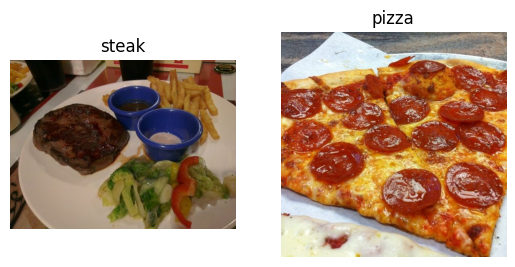

In [ ]:
#Visualize data
plt.figure()
plt.subplot(1 , 2 , 1)
steak_img = view_random_image("pizza_steak/train/" , "steak")
plt.subplot(1 , 2 , 2)
pizza_img = view_random_image("pizza_steak/train/" , "pizza")


##Preprocess

In [ ]:
#Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"
#---> A batch is a small subset of the data


In [ ]:
#Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)



In [ ]:
train_data = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = (224 , 224),
    class_mode = "binary",
    batch_size = 32
)

test_data = test_datagen.flow_from_directory(
    directory = test_dir,
    target_size = (224 , 224),
    class_mode = "binary",
    batch_size = 32
)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#Get a sample of a train data patch
images , labels = train_data.next() #Get the next batch of images/labels in train_data
len(images) , len(labels)

(32, 32)

In [ ]:
#Get the First 2 images
images[31].shape

(224, 224, 3)

In [ ]:
train_data.class_indices

{'pizza': 0, 'steak': 1}

## 3. Create a CNN Model (start with a baseline)

In [ ]:
#Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense , Flatten , Conv2D , MaxPool2D , Activation
from tensorflow.keras import Sequential



In [ ]:
#Create the model(Base Line)
model_4 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3 ,
           strides =1 ,
           padding = 'valid' ,
           input_shape = (224 , 224 , 3)),

    Conv2D(10 , 3 , activation = 'relu'),

    Conv2D(10 , 3 , activation = 'relu'),

    Flatten(),
    Dense(1 , activation = 'sigmoid')
])
model_4.compile(loss = tf.keras.losses.BinaryFocalCrossentropy() ,
                optimizer = Adam(),
                metrics = ['accuracy'])


In [ ]:
model_4.fit(train_data , epochs = 1 , steps_per_epoch = len(train_data) , validation_data = test_data , validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 159ms/step - loss: 4.3262e-04 - accuracy: 1.0000 - val_loss: 0.2498 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 6s 117ms/step - loss: 3.4016e-04 - accuracy: 1.0000 - val_loss: 0.2638 - val_accuracy: 0.7900
Epoch 3/5
47/47 [==============================] - 7s 158ms/step - loss: 2.7365e-04 - accuracy: 1.0000 - val_loss: 0.2654 - val_accuracy: 0.7880
Epoch 4/5
47/47 [==============================] - 5s 114ms/step - loss: 2.1684e-04 - accuracy: 1.0000 - val_loss: 0.2702 - val_accuracy: 0.7800
Epoch 5/5
47/47 [==============================] - 5s 115ms/step - loss: 1.8142e-04 - accuracy: 1.0000 - val_loss: 0.2793 - val_accuracy: 0.7820


In [ ]:
#Create the model(Base Line)
model_4_2 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3 ,
           strides =1 ,
           padding = 'valid' ,
           input_shape = (224 , 224 , 3)),

    Conv2D(10 , 3 , activation = 'relu'),

    Conv2D(10 , 3 , activation = 'relu'),

    Flatten(),
    Dense(1 , activation = 'sigmoid')
])
model_4_2.compile(loss = tf.keras.losses.BinaryFocalCrossentropy() ,
                optimizer = Adam(),
                metrics = ['accuracy'])
history_4_2 = model_4_2.fit(train_data , epochs = 5 , steps_per_epoch = len(train_data) , validation_data = test_data , validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 175ms/step - loss: 0.5776 - accuracy: 0.5120 - val_loss: 0.1712 - val_accuracy: 0.5620
Epoch 2/5
47/47 [==============================] - 8s 171ms/step - loss: 0.1494 - accuracy: 0.6873 - val_loss: 0.1339 - val_accuracy: 0.7540
Epoch 3/5
47/47 [==============================] - 8s 167ms/step - loss: 0.0960 - accuracy: 0.8653 - val_loss: 0.1410 - val_accuracy: 0.7380
Epoch 4/5
47/47 [==============================] - 7s 138ms/step - loss: 0.0602 - accuracy: 0.9407 - val_loss: 0.1408 - val_accuracy: 0.7680
Epoch 5/5
47/47 [==============================] - 7s 148ms/step - loss: 0.0209 - accuracy: 0.9867 - val_loss: 0.1630 - val_accuracy: 0.7780


<Axes: >

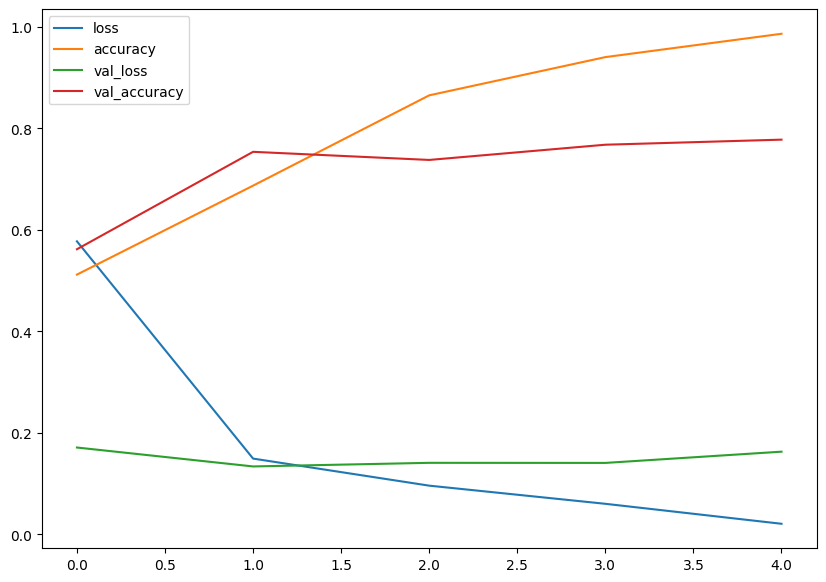

In [ ]:
#Evaluate our model

#Plo training curve
import pandas as pd
pd.DataFrame(history_4_2.history).plot(figsize = (10 , 7))


In [17]:
def plot_loss_curves(history_before , history_after):
  first_loss = history_before.history["loss"]
  second_loss = history_after.history['val_loss']
  first_accuracy = history_before.history["accuracy"]
  second_accuracy = history_after.history["val_accuracy"]
  epochs = range(len(history_before.history["loss"]))
  #Plot Loss
  plt.plot(epochs , first_loss , label = " Loss")
  plt.plot(epochs , second_loss , label = "Val Loss" )
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()
  #Plot accuracy
  plt.figure()
  plt.plot(epochs , first_accuracy , label = "Model_1_Accuracy")
  plt.plot(epochs , second_accuracy , label = "Model_2_ val Accuracy" )
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()



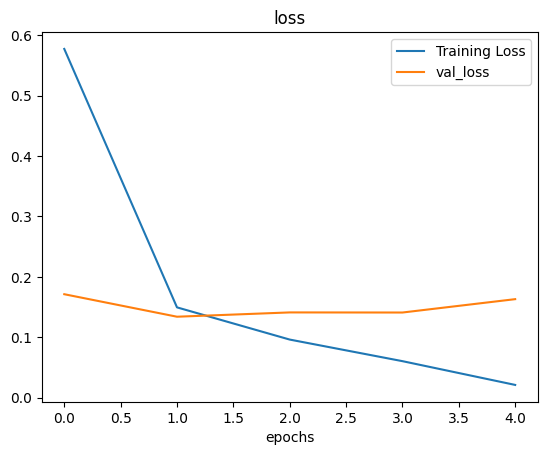

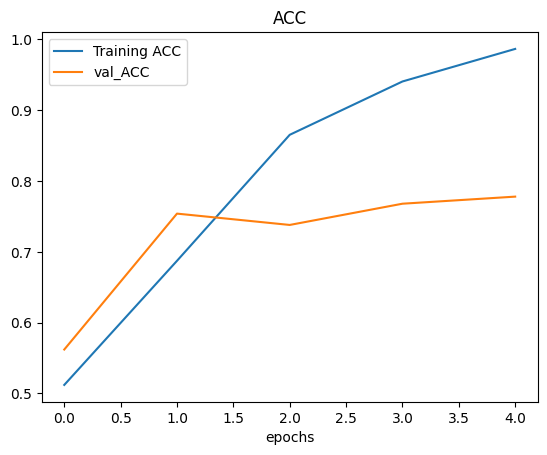

In [ ]:
plot_loss_curves(history_4_2)

In [ ]:
#Adjust Model parameters
#REDUCE OVERFITTING
#--> Increase the number of Conv Layers
#--> increase the number of Conv Filters
#--> Add another Dense Layer
#Reduce overfitting:
#--> data aug , regularizzation [max pool 2D] , More Data

#Create a Model (this is going to be our new BaseLine)

model_5 = Sequential([
    Conv2D(10 , 3 , activation = 'relu' , input_shape = (224 , 224 , 3)),
    MaxPool2D(pool_size = 2) ,
    Conv2D(10 , 3 , activation = 'relu'),
    MaxPool2D(pool_size = 2) ,
    Conv2D(10 , 3 , activation = 'relu'),
    MaxPool2D(pool_size = 2) ,
    Flatten() ,
    Dense(1 , activation = 'sigmoid')
])


In [ ]:
model_5.compile(loss = "binary_crossentropy" ,
                optimizer = "Adam" ,
                metrics = "accuracy")


In [ ]:
history_5 = model_5.fit(train_data , epochs = 5 , steps_per_epoch = len(train_data) , validation_data = test_data , validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 9s 156ms/step - loss: 0.6697 - accuracy: 0.6127 - val_loss: 0.5397 - val_accuracy: 0.7480
Epoch 2/5
47/47 [==============================] - 6s 119ms/step - loss: 0.4703 - accuracy: 0.7907 - val_loss: 0.3757 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 5s 108ms/step - loss: 0.4198 - accuracy: 0.8220 - val_loss: 0.3336 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 7s 144ms/step - loss: 0.3958 - accuracy: 0.8247 - val_loss: 0.3506 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 5s 108ms/step - loss: 0.3988 - accuracy: 0.8233 - val_loss: 0.3325 - val_accuracy: 0.8760


In [ ]:
#Get Summary
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

In [ ]:
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_10 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_2 (Flatten)         (None, 475240)            0         
                                                                 
 dense_2 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


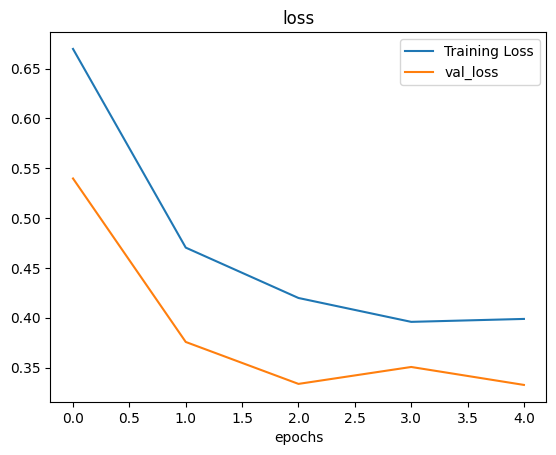

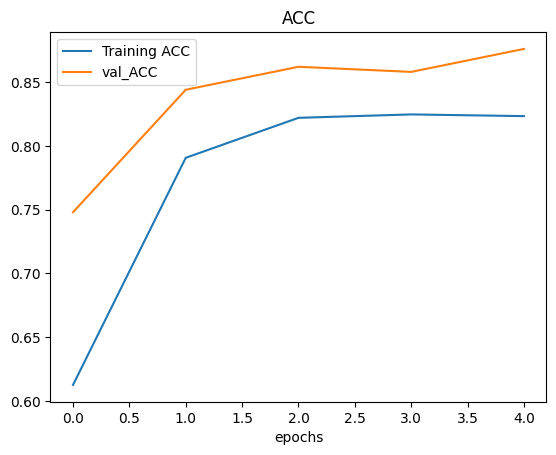

In [ ]:
#Plot Loss curves
plot_loss_curves(history_5)

In [ ]:
#Create ImageDataGenerator training instances with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1/255. ,
                                             rotation_range = 0.2 ,##--> Range
                                             shear_range = 0.2 ,##--> Range
                                             zoom_range = 0.2 ,##--> Range
                                             width_shift_range = 0.2 ,##--> Range
                                             height_shift_range = 0.3,##--> Range
                                             horizontal_flip = True)
#Create ImageDataGen without Data aug for train data
train_datagen = ImageDataGenerator(rescale = 1/255.)

#Create ImageDataGen without Data aug for test data
test_datagen = ImageDataGenerator(rescale = 1/255.)



In [ ]:
#Import data and augment it from training Dir
print("aug train Data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir ,
                                                                   target_size = (224 , 224),
                                                                   batch_size = 32,
                                                                   class_mode = "binary" ,
                                                                   shuffle = False) #for demonstartion purpose only
#Create non-augmented data batches (train)
print("non aug train Data")

train_data = train_datagen.flow_from_directory(train_dir ,
                                               target_size = (224 , 224) ,
                                               batch_size = 32,
                                               class_mode = "binary",
                                               shuffle = False)
#Create non-augmented data batches (test)
print("non aug test Data")

test_data = test_datagen.flow_from_directory(test_dir ,
                                               target_size = (224 , 224) ,
                                               batch_size = 32,
                                               class_mode = "binary",
                                               shuffle = False)


aug train Data
Found 1500 images belonging to 2 classes.
non aug train Data
Found 1500 images belonging to 2 classes.
non aug test Data
Found 500 images belonging to 2 classes.


In [ ]:
#Get sample  data batches
images , labels = train_data.next()
aug_imgs , aug_labels = train_data_augmented.next() #Note : Labels are not aug

(-0.5, 223.5, 223.5, -0.5)

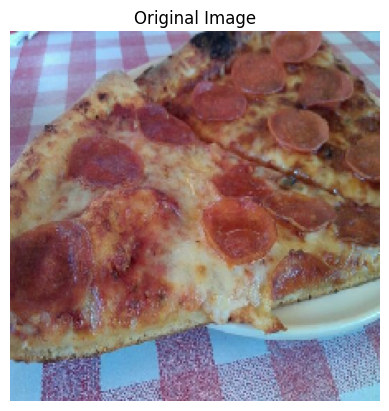

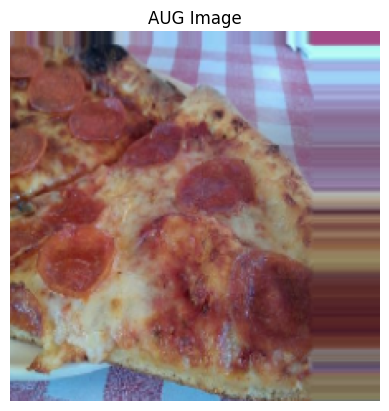

In [ ]:
#Show original image and aug one
random_number = random.randint(0 , 32)
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(aug_imgs[random_number])
plt.title(f"AUG Image")
plt.axis(False)

In [ ]:
#Create the model that Training on AUG Data (Same as Model_5)

model_6 = Sequential([
    Conv2D(10 , 3 , activation = 'relu' , input_shape = (224 , 224 , 3)),
    MaxPool2D(pool_size = 2) ,
    Conv2D(10 , 3 , activation = 'relu'),
    MaxPool2D(pool_size = 2) ,
    Conv2D(10 , 3 , activation = 'relu'),
    MaxPool2D(pool_size = 2) ,
    Flatten() ,
    Dense(1 , activation = 'sigmoid')
])
model_6.compile(loss = "binary_crossentropy" ,
                optimizer = "Adam" ,
                metrics = "accuracy"
                )

history_6 = model_6.fit(train_data_augmented ,
            steps_per_epoch= len(train_data_augmented) ,
            validation_data = test_data,
            epochs = 5 , validation_steps = len(test_data))


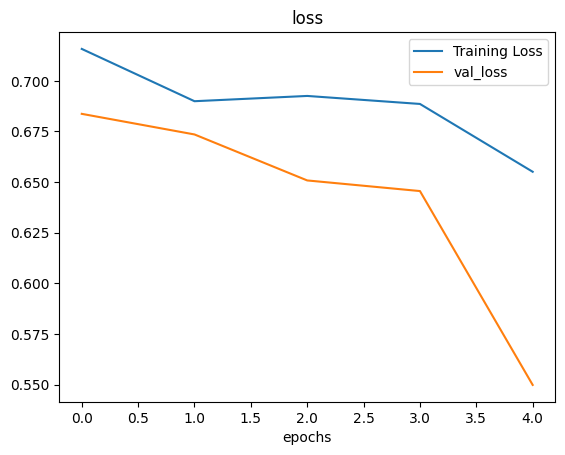

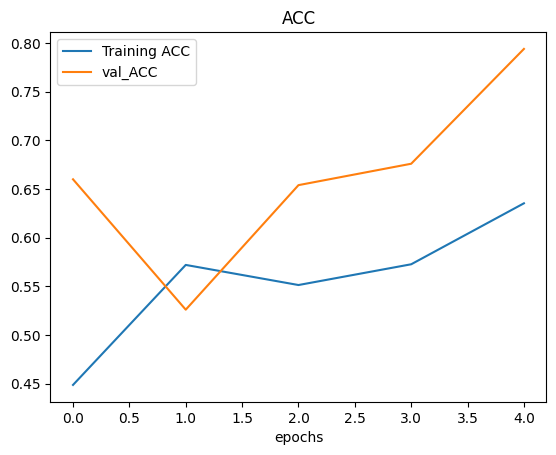

In [ ]:
#Check our models Training Curves
plot_loss_curves(history_6)

In [ ]:
train_data_aug_shuffeled  = train_datagen_augmented.flow_from_directory(train_dir ,
                                                                        target_size = (224 , 224),
                                                                        class_mode = "binary",
                                                                        batch_size  = 32,
                                                                        shuffle = True)

Found 1500 images belonging to 2 classes.


In [ ]:
#Shuffling out Aug Data

#Re Import data and aug it and Shuffle if Using Shuffle Parameter

#Create the model (same as m5 and m6)
model_7 = Sequential([
    Conv2D(10 , 3 , activation = 'relu' , input_shape = (224 , 224 , 3)),
    MaxPool2D(pool_size = 2) ,
    Conv2D(10 , 3 , activation = 'relu'),
    MaxPool2D(pool_size = 2) ,
    Conv2D(10 , 3 , activation = 'relu'),
    MaxPool2D(pool_size = 2) ,
    Flatten() ,
    Dense(1 , activation = 'sigmoid')
])
model_7.compile(loss = "binary_crossentropy" ,
                optimizer = "Adam" ,
                metrics = "accuracy"
                )

history_7 = model_7.fit(train_data_aug_shuffeled ,
            steps_per_epoch= len(train_data_aug_shuffeled) ,
            validation_data = test_data,
            epochs = 5 , validation_steps = len(test_data))

Found 1500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 25s 504ms/step - loss: 0.7205 - accuracy: 0.5133 - val_loss: 0.6840 - val_accuracy: 0.5120
Epoch 2/5
47/47 [==============================] - 25s 536ms/step - loss: 0.6664 - accuracy: 0.5887 - val_loss: 0.5538 - val_accuracy: 0.7580
Epoch 3/5
47/47 [==============================] - 21s 455ms/step - loss: 0.6097 - accuracy: 0.6780 - val_loss: 0.4867 - val_accuracy: 0.8020
Epoch 4/5
47/47 [==============================] - 24s 513ms/step - loss: 0.5423 - accuracy: 0.7447 - val_loss: 0.4296 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 22s 460ms/step - loss: 0.5654 - accuracy: 0.7253 - val_loss: 0.4681 - val_accuracy: 0.8080


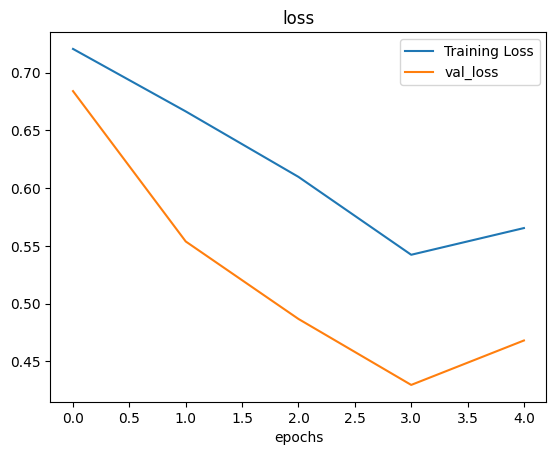

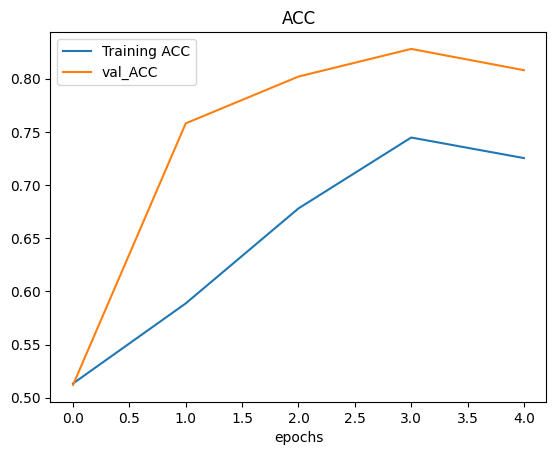

In [ ]:
plot_loss_curves(history_7)

In [ ]:
###---------------------->How to improve Performance
model_8 = Sequential([
    Conv2D(20 , 3 , activation = 'relu' , input_shape = (224 , 224 , 3)),
    Conv2D(10 , 3 , activation = 'relu'),
    MaxPool2D(pool_size = 2) ,
    Conv2D(10 , 3 , activation = 'relu'),
    MaxPool2D(pool_size = 2) ,
    Conv2D(10 , 3 , activation = 'relu'),
    MaxPool2D(pool_size = 2) ,
    Flatten() ,
    Dense(1 , activation = 'sigmoid')
])
model_8.compile(loss = "binary_crossentropy" ,
                optimizer = "Adam" ,
                metrics = "accuracy"
                )

history_8 = model_8.fit(train_data_aug_shuffeled ,
            steps_per_epoch= len(train_data_aug_shuffeled) ,
            validation_data = test_data,
            epochs = 5 , validation_steps = len(test_data))

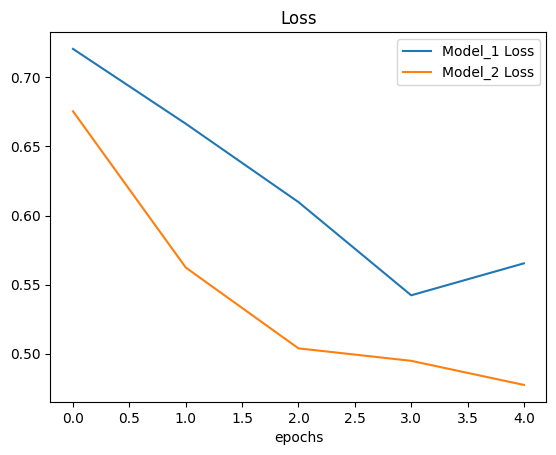

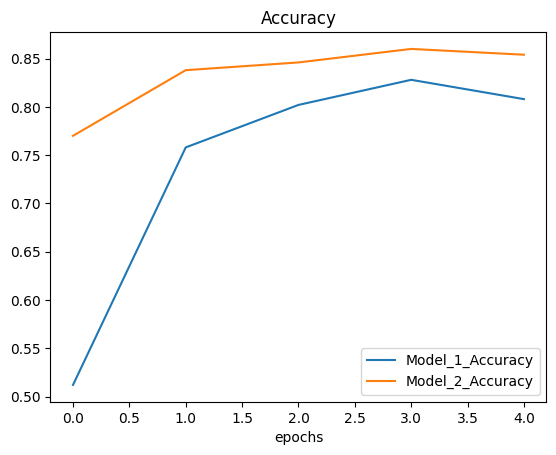

In [ ]:
plot_loss_curves(history_7,history_8)

In [ ]:
model_9 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(20 , 3 , activation = 'relu' , input_shape = (224 , 224 , 3)),
    tf.keras.layers.Conv2D(10 , 3 , activation = "relu" ) ,
    tf.keras.layers.MaxPool2D(pool_size = 2),  ##--> First Pool
    tf.keras.layers.Conv2D(10 , 3 , activation = 'relu'),
    tf.keras.layers.Conv2D(10 , 3 , activation = 'relu') ,
    tf.keras.layers.MaxPool2D(pool_size = 2), ##--> Second pool
    tf.keras.layers.Conv2D(10 , 3 , activation = 'relu') ,
    tf.keras.layers.Conv2D(10 , 3 , activation = 'relu') ,
    tf.keras.layers.MaxPool2D(pool_size = 2), ##--> 3rd pool
    tf.keras.layers.Flatten() ,
    tf.keras.layers.Dense(1 , activation = 'sigmoid')
])



model_9.compile(loss = "binary_crossentropy" ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ['accuracy'])


In [ ]:
history_9 = model_9.fit(
    train_data_aug_shuffeled ,
    steps_per_epoch = len(train_data_aug_shuffeled) ,
    validation_data = test_data ,
    validation_steps= len(test_data) ,
    epochs = 5
)



Epoch 1/5
47/47 [==============================] - 28s 525ms/step - loss: 0.6474 - accuracy: 0.6320 - val_loss: 0.5076 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 22s 473ms/step - loss: 0.5712 - accuracy: 0.7173 - val_loss: 0.3991 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 25s 533ms/step - loss: 0.5382 - accuracy: 0.7467 - val_loss: 0.4026 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 22s 473ms/step - loss: 0.5040 - accuracy: 0.7687 - val_loss: 0.4090 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 23s 487ms/step - loss: 0.5202 - accuracy: 0.7627 - val_loss: 0.4954 - val_accuracy: 0.7480


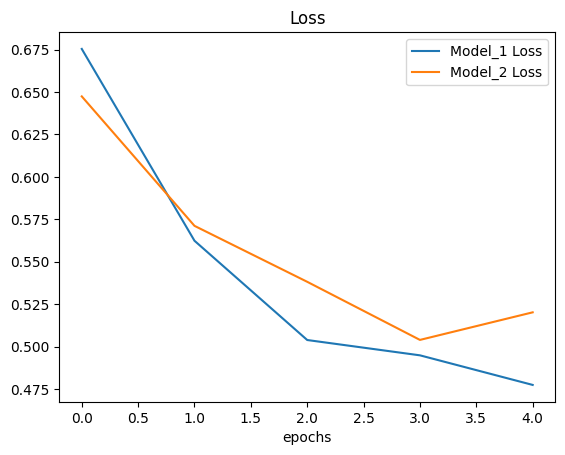

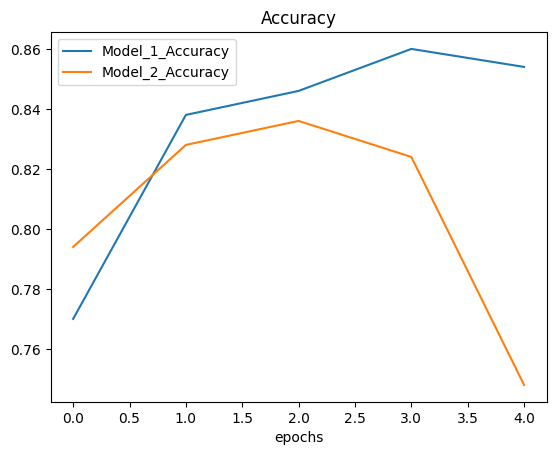

In [ ]:
plot_loss_curves(history_8 , history_9)

In [ ]:
model_X = Sequential([
    Conv2D(20 , 3 , activation = 'relu' , input_shape = (224 , 224 , 3)),
    Conv2D(10 , 3 , activation = 'relu'),
    MaxPool2D(pool_size = 2) ,
    Conv2D(10 , 3 , activation = 'relu'),
    MaxPool2D(pool_size = 2) ,
    Conv2D(10 , 3 , activation = 'relu'),
    MaxPool2D(pool_size = 2) ,
    Flatten() ,
    Dense(1 , activation = 'sigmoid')
])
model_X.compile(loss = "binary_crossentropy" ,
                optimizer = "Adam" ,
                metrics = "accuracy"
                )

history_X = model_X.fit(train_data_aug_shuffeled ,
            steps_per_epoch= len(train_data_aug_shuffeled) ,
            validation_data = test_data,
            epochs = 10 , validation_steps = len(test_data))

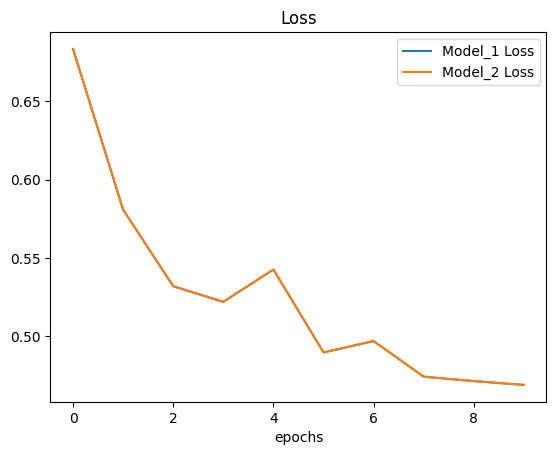

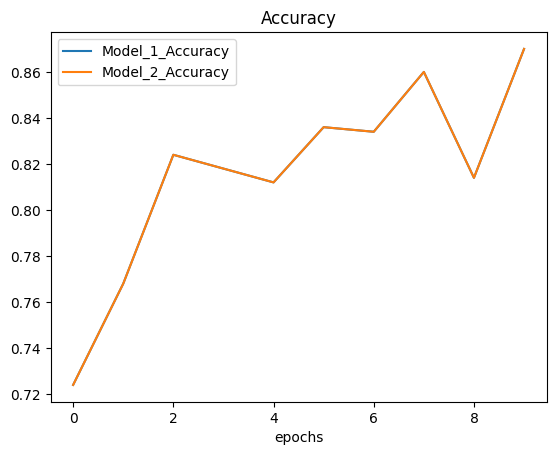

In [ ]:
plot_loss_curves(history_X , history_X)

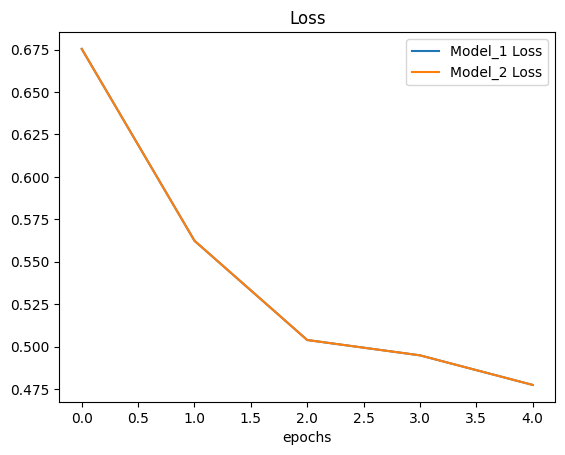

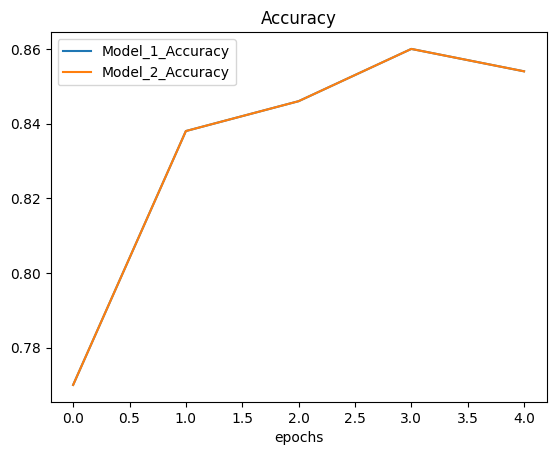

In [ ]:
plot_loss_curves(history_8 , history_8)

In [ ]:
history_8.history['val_accuracy'][4] ,history_X.history['val_accuracy'][9]

(0.8539999723434448, 0.8700000047683716)

In [ ]:
model_XI = Sequential([
    Conv2D(20 , 3 , activation = 'relu' , input_shape = (224 , 224 , 3)),
    Conv2D(20 , 3 , activation = 'relu'),
    MaxPool2D(pool_size = 2) ,
    Conv2D(20 , 3 , activation = 'relu'),
    MaxPool2D(pool_size = 2) ,
    Conv2D(10 , 3 , activation = 'relu'),
    MaxPool2D(pool_size = 2) ,
    Flatten() ,
    Dense(1 , activation = 'sigmoid')
])
model_XI.compile(loss = "binary_crossentropy" ,
                optimizer = "Adam" ,
                metrics = "accuracy"
                )

history_XI = model_XI.fit(train_data_aug_shuffeled ,
            steps_per_epoch= len(train_data_aug_shuffeled) ,
            validation_data = test_data,
            epochs = 10 , validation_steps = len(test_data))

Epoch 1/10
47/47 [==============================] - 27s 550ms/step - loss: 0.6435 - accuracy: 0.5913 - val_loss: 0.4732 - val_accuracy: 0.7680
Epoch 2/10
47/47 [==============================] - 22s 473ms/step - loss: 0.5281 - accuracy: 0.7420 - val_loss: 0.3711 - val_accuracy: 0.8140
Epoch 3/10
47/47 [==============================] - 25s 518ms/step - loss: 0.5222 - accuracy: 0.7487 - val_loss: 0.3897 - val_accuracy: 0.8280
Epoch 4/10
47/47 [==============================] - 24s 502ms/step - loss: 0.4994 - accuracy: 0.7653 - val_loss: 0.3527 - val_accuracy: 0.8460
Epoch 5/10
47/47 [==============================] - 24s 496ms/step - loss: 0.4975 - accuracy: 0.7593 - val_loss: 0.3700 - val_accuracy: 0.8440
Epoch 6/10
47/47 [==============================] - 22s 477ms/step - loss: 0.4689 - accuracy: 0.7833 - val_loss: 0.3314 - val_accuracy: 0.8620
Epoch 7/10
47/47 [==============================] - 22s 475ms/step - loss: 0.5030 - accuracy: 0.7533 - val_loss: 0.3479 - val_accuracy: 0.8580

In [ ]:
model_XII = Sequential([
    Conv2D(20 , 3 , activation = 'relu' , input_shape = (224 , 224 , 3)),
    Conv2D(10 , 3 , activation = 'relu'),
    MaxPool2D(pool_size = 2) ,
    Conv2D(10 , 3 , activation = 'relu'),
    MaxPool2D(pool_size = 2) ,
    Conv2D(10 , 3 , activation = 'relu'),
    MaxPool2D(pool_size = 2) ,
    Conv2D(10 , 3 , activation = 'relu'),
    MaxPool2D(pool_size = 2) ,
    Flatten() ,
    Dense(1 , activation = 'sigmoid')
])
model_XII.compile(loss = "binary_crossentropy" ,
                optimizer = "Adam" ,
                metrics = "accuracy"
                )

history_XII = model_XII.fit(train_data_aug_shuffeled ,
            steps_per_epoch= len(train_data_aug_shuffeled) ,
            validation_data = test_data,
            epochs = 5 , validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 465ms/step - loss: 0.6936 - accuracy: 0.4927 - val_loss: 0.6924 - val_accuracy: 0.4920
Epoch 2/5
47/47 [==============================] - 23s 484ms/step - loss: 0.6857 - accuracy: 0.5207 - val_loss: 0.6401 - val_accuracy: 0.5440
Epoch 3/5
47/47 [==============================] - 24s 512ms/step - loss: 0.6165 - accuracy: 0.6687 - val_loss: 0.4753 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 25s 540ms/step - loss: 0.5455 - accuracy: 0.7287 - val_loss: 0.4303 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 24s 506ms/step - loss: 0.5370 - accuracy: 0.7373 - val_loss: 0.4179 - val_accuracy: 0.8400


In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

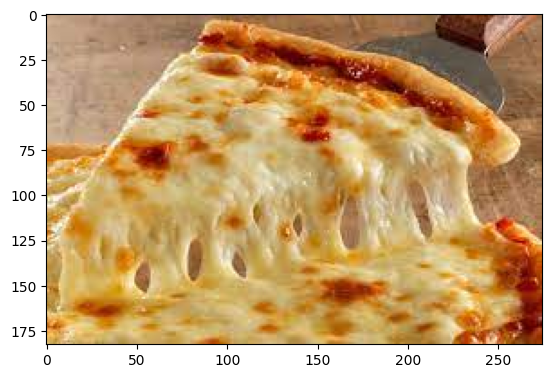

In [ ]:
steak = mpimg.imread("piz.jpeg")
plt.imshow(steak)

In [ ]:
steak.shape

(183, 275, 3)

In [ ]:
model_XI.predict(steak)

ValueError: ignored

In [ ]:
#Creating a function to take an image and resize it to be able to use it with the model
def load_prep_img (filename , img_shape = 224):
  img = tf.io.read_file(filename)
  #Decode the read file into a tensor
  img = tf.image.decode_image(img)
  #RESIZE
  img = tf.image.resize(img , size = [img_shape , img_shape])
  #Rescal the image (normalization)
  img = img / 255.
  return img

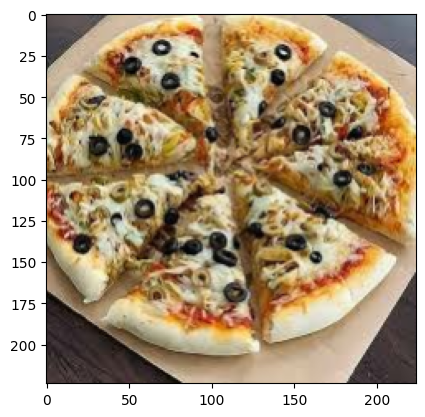

In [ ]:
test = load_prep_img("piz4.jpeg")
plt.imshow(test)

In [ ]:
if model_XI.predict(tf.expand_dims(test , axis = 0)) > 0.5 :
  print (f"It's a Steak")
else: print(f"It's a PIZZA")

1/1 [==============================] - 0s 18ms/step
It's a PIZZA


# Multi-Class Image Classification


## 1. Import and Become One with the data


In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
#unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip" , 'r')
zip_ref.extractall()
zip_ref.close()

--2023-12-09 16:02:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.207, 173.194.79.207, 108.177.96.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  39.5MB/s    in 13s     

2023-12-09 16:02:20 (37.3 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os
#Walk through the 10 classes
for dirpath , dirnames , filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} Dirs and {len(filenames)} images in '{dirpath}' ")

There are 2 Dirs and 0 images in '10_food_classes_all_data' 
There are 10 Dirs and 0 images in '10_food_classes_all_data/test' 
There are 0 Dirs and 250 images in '10_food_classes_all_data/test/sushi' 
There are 0 Dirs and 250 images in '10_food_classes_all_data/test/fried_rice' 
There are 0 Dirs and 250 images in '10_food_classes_all_data/test/pizza' 
There are 0 Dirs and 250 images in '10_food_classes_all_data/test/ramen' 
There are 0 Dirs and 250 images in '10_food_classes_all_data/test/grilled_salmon' 
There are 0 Dirs and 250 images in '10_food_classes_all_data/test/chicken_wings' 
There are 0 Dirs and 250 images in '10_food_classes_all_data/test/hamburger' 
There are 0 Dirs and 250 images in '10_food_classes_all_data/test/ice_cream' 
There are 0 Dirs and 250 images in '10_food_classes_all_data/test/chicken_curry' 
There are 0 Dirs and 250 images in '10_food_classes_all_data/test/steak' 
There are 10 Dirs and 0 images in '10_food_classes_all_data/train' 
There are 0 Dirs and 750 i

In [4]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"


In [5]:
#Get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(
    sorted(
        [item.name for item in data_dir.glob("*")]
        )
    )
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
#vis vis vis
import random
img = view_random_image(target_dir = train_dir ,
                        target_class = random.choice(class_names))

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
### Preprocess

#Rescale
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

#Load data in from dirs
train_data = train_datagen.flow_from_directory(train_dir ,
                                               target_size = (224 , 224) ,
                                               batch_size = 32,
                                               class_mode = "categorical",
                                               )
test_data = train_datagen.flow_from_directory(test_dir ,
                                               target_size = (224 , 224) ,
                                               batch_size = 32,
                                               class_mode = "categorical",
                                               )


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
###-> Creating the model
model_1_m = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10 , 3 , input_shape = (224 , 224 , 3), activation = 'relu'),
    tf.keras.layers.Conv2D(10 , 3 , activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size= 2),
    tf.keras.layers.Conv2D(10 , 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10 , 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size= 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10 , activation = 'softmax')
])
#compile the model
model_1_m.compile(loss = "categorical_crossentropy" ,
                  optimizer = tf.keras.optimizers.Adam(),
                  metrics = ["accuracy"])

model_1_m.fit(train_data , epochs = 5 , steps_per_epoch = len(train_data),
              validation_data= test_data , validation_steps= len(test_data))

In [12]:
### 5. Evaluate The model
model_1_m.evaluate(test_data)

79/79 [==============================] - 9s 108ms/step - loss: 4.4709 - accuracy: 0.2644


[4.4709320068359375, 0.26440000534057617]

In [14]:
#Reduce OverFitting --> More Data --> Data Aug --> Better Data --> Use Transfer Learning


#----> Simplify our model First
model_1_m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [15]:
#--->  Let's try to simplify our model by removing 2 Conv2D Layers
model_1k = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10 , 3 , input_shape = (224 , 224 , 3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size= 2),
    tf.keras.layers.Conv2D(10 , 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size= 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10 , activation = 'softmax')
])
#compile the model
model_1k.compile(loss = "categorical_crossentropy" ,
                  optimizer = tf.keras.optimizers.Adam(),
                  metrics = ["accuracy"])

hist9 = model_1k.fit(train_data , epochs = 5 , steps_per_epoch = len(train_data),
              validation_data= test_data , validation_steps= len(test_data))

Epoch 1/5
235/235 [==============================] - 34s 137ms/step - loss: 2.1557 - accuracy: 0.2273 - val_loss: 1.9805 - val_accuracy: 0.3088
Epoch 2/5
235/235 [==============================] - 31s 131ms/step - loss: 1.8202 - accuracy: 0.3829 - val_loss: 1.9108 - val_accuracy: 0.3356
Epoch 3/5
235/235 [==============================] - 32s 135ms/step - loss: 1.4032 - accuracy: 0.5433 - val_loss: 2.0501 - val_accuracy: 0.3128
Epoch 4/5
235/235 [==============================] - 30s 126ms/step - loss: 0.8961 - accuracy: 0.7240 - val_loss: 2.3464 - val_accuracy: 0.2944
Epoch 5/5
235/235 [==============================] - 31s 133ms/step - loss: 0.4793 - accuracy: 0.8619 - val_loss: 2.7870 - val_accuracy: 0.2868


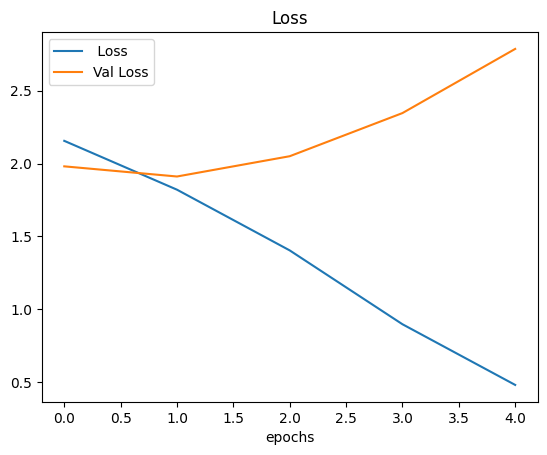

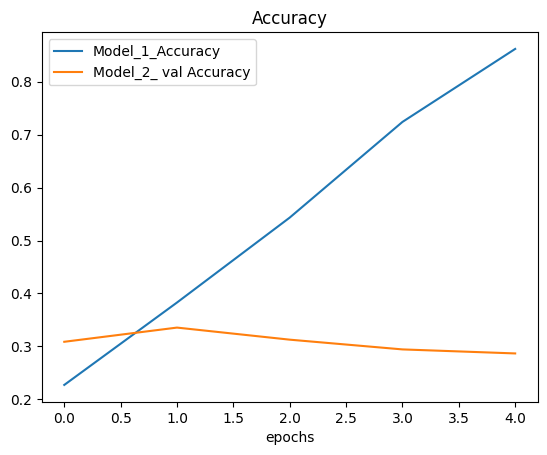

In [19]:
plot_loss_curves (hist9 , hist9)

In [20]:
model_1k.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [21]:
model_1_m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [22]:
#Trying Data Augmentation

